<a href="https://colab.research.google.com/github/pratikasarkar/Capstone_Project/blob/pratik_workingBranch/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/gdrive/My Drive/autos.csv',encoding='latin_1')

In [0]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


## Converting german values to english for all categorical features

In [0]:
df['seller'].value_counts()

privat        371719
gewerblich         3
Name: seller, dtype: int64

In [0]:
df['seller'].replace({'privat':'private',
                      'gewerblich':'commercial'},
                     inplace = True)
df['seller'].head()

0    private
1    private
2    private
3    private
4    private
Name: seller, dtype: object

In [0]:
df['offerType'].value_counts()

Angebot    371710
Gesuch         12
Name: offerType, dtype: int64

In [0]:
df['offerType'].replace({'Angebot':'offer',
                      'Gesuch':'application'},
                     inplace = True)
df['offerType'].head()

0    offer
1    offer
2    offer
3    offer
4    offer
Name: offerType, dtype: object

In [0]:
df['abtest'].value_counts()

test       192683
control    179039
Name: abtest, dtype: int64

In [0]:
df['vehicleType'].value_counts()

limousine     95936
kleinwagen    80077
kombi         67602
bus           30214
cabrio        22911
coupe         19023
suv           14714
andere         3359
Name: vehicleType, dtype: int64

In [0]:
df['vehicleType'].replace({'kleinwagen':'small car',
                      'kombi':'combi',
                      'cabrio':'convertible',
                      'andere' : 'other'},
                     inplace = True)
df['vehicleType'].head()

0          NaN
1        coupe
2          suv
3    small car
4    small car
Name: vehicleType, dtype: object

In [0]:
df['gearbox'].value_counts()

manuell      274355
automatik     77150
Name: gearbox, dtype: int64

In [0]:
df['gearbox'].replace({'manuell':'manual',
                      'automatik':'automatic'},
                     inplace = True)
df['gearbox'].head()

0       manual
1       manual
2    automatic
3       manual
4       manual
Name: gearbox, dtype: object

In [0]:
orig_list = list(df['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']

In [0]:
df['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


In [0]:
df['monthOfRegistration'].value_counts()

0     37695
3     36186
6     33194
4     30939
5     30643
7     28979
10    27354
11    25499
12    25395
9     25083
1     24567
8     23775
2     22414
Name: monthOfRegistration, dtype: int64

In [0]:
df['fuelType'].value_counts()

benzin     223974
diesel     107802
lpg          5379
cng           571
hybrid        281
andere        208
elektro       104
Name: fuelType, dtype: int64

In [0]:
df['fuelType'].replace({'benzin':'petrol',
                      'andere':'other',
                      'elektro':'electric'},
                     inplace = True)
df['fuelType'].head()

0    petrol
1    diesel
2    diesel
3    petrol
4    diesel
Name: fuelType, dtype: object

In [0]:
df['brand'].value_counts()

volkswagen        79672
bmw               40291
opel              40153
mercedes_benz     35339
audi              32889
ford              25584
renault           17988
peugeot           11032
fiat               9677
seat               7023
mazda              5697
skoda              5645
smart              5251
citroen            5185
nissan             5040
toyota             4699
sonstige_autos     3983
hyundai            3649
mini               3397
volvo              3328
mitsubishi         3062
honda              2838
kia                2556
alfa_romeo         2348
suzuki             2330
porsche            2215
chevrolet          1847
chrysler           1454
dacia               900
jeep                808
daihatsu            806
subaru              779
land_rover          772
jaguar              621
trabant             592
daewoo              543
saab                531
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [0]:
df['notRepairedDamage'].value_counts()

nein    263325
ja       36302
Name: notRepairedDamage, dtype: int64

In [0]:
df['notRepairedDamage'].replace({'nein':'No',
                      'ja':'Yes'},
                     inplace = True)
df['notRepairedDamage'].head()

0    NaN
1    Yes
2    NaN
3     No
4     No
Name: notRepairedDamage, dtype: object

In [0]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,petrol,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,Yes,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47


# Exploring the dataset

In [0]:
df.shape

(371723, 20)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371723 entries, 0 to 371722
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371723 non-null  object 
 1   name                 371723 non-null  object 
 2   seller               371722 non-null  object 
 3   offerType            371722 non-null  object 
 4   price                371722 non-null  float64
 5   abtest               371722 non-null  object 
 6   vehicleType          333836 non-null  object 
 7   yearOfRegistration   371722 non-null  float64
 8   gearbox              351505 non-null  object 
 9   powerPS              371723 non-null  int64  
 10  model                351232 non-null  object 
 11  kilometer            371723 non-null  int64  
 12  monthOfRegistration  371723 non-null  int64  
 13  fuelType             338319 non-null  object 
 14  brand                371723 non-null  object 
 15  notRepairedDamage

In [0]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371723 entries, 0 to 371722
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371723 non-null  datetime64[ns]
 1   name                 371723 non-null  object        
 2   seller               371722 non-null  object        
 3   offerType            371722 non-null  object        
 4   price                371722 non-null  float64       
 5   abtest               371722 non-null  object        
 6   vehicleType          333836 non-null  object        
 7   yearOfRegistration   371722 non-null  float64       
 8   gearbox              351505 non-null  object        
 9   powerPS              371723 non-null  int64         
 10  model                351232 non-null  object        
 11  kilometer            371723 non-null  int64         
 12  monthOfRegistration  371723 non-null  int64         
 13  fuelType      

In [49]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:00,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-07-04 03:16:00
1,2016-03-24 10:58:00,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,0,66954,2016-07-04 01:46:00
2,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-05-04 12:47:00
3,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75,golf,150000,6,petrol,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,0,60437,2016-06-04 10:17:00


# Imputing missing values

In [0]:
missing_count_list = []
for col in df.columns:
  missing_count_list.append(df[col].isnull().sum())
missing_count_df = pd.DataFrame(missing_count_list,columns=['count'],index = df.columns)
missing_count_df.sort_values('count',ascending=False)

,count
notRepairedDamage,72096
vehicleType,37887
fuelType,33404
model,20491
gearbox,20218
seller,1
offerType,1
price,1
abtest,1
yearOfRegistration,1


In [172]:
df['price'].describe()

count    3.717220e+05
mean     1.729044e+04
std      3.587017e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

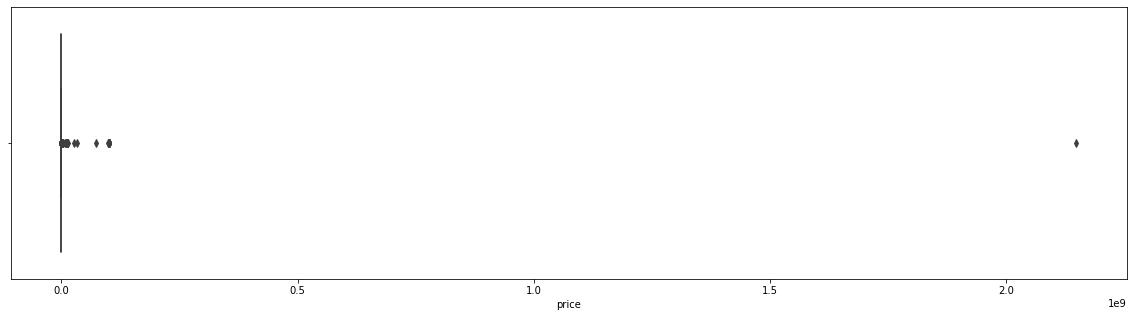

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

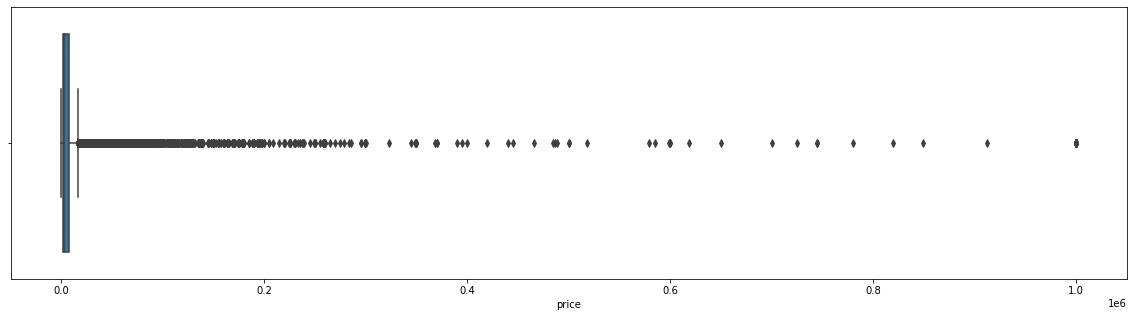

In [171]:
plt.figure(figsize = (20,5))
sns.boxplot(df[(df['price']>=100) & (df['price']<=1000000)]['price'])

### Outlier detection using Isolation Forest

In [0]:
dfprice = df[(df['price']>=150) & (df['price']<=1000000)&(df['price'].isnull() == False)]['price']

[[1.50000000e+02]
 [1.52689779e+02]
 [1.55379558e+02]
 ...
 [9.99994620e+05]
 [9.99997310e+05]
 [1.00000000e+06]]


Text(0.5, 1.0, 'price')

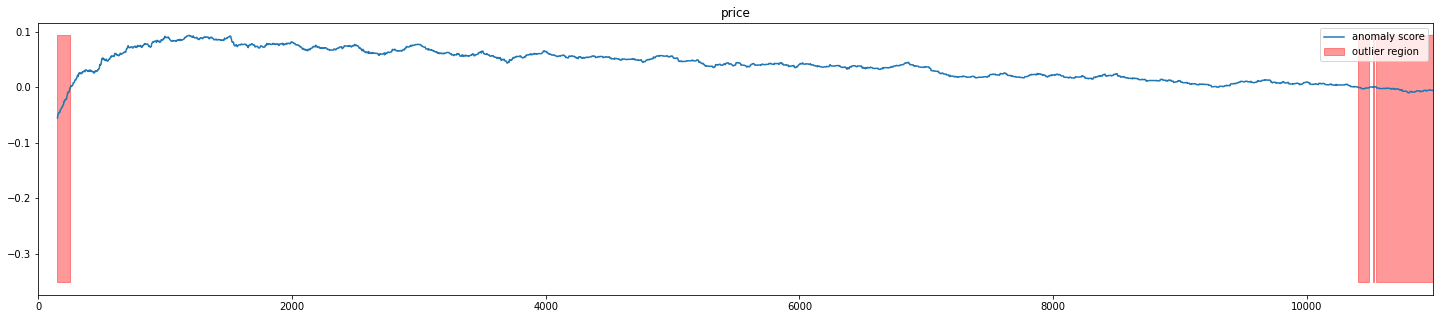

In [216]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(dfprice.values.reshape(-1,1))

xx = np.linspace(dfprice.min(), dfprice.max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(0, 11000)
# plt.axis([0,100000,0,0])
plt.title('price')

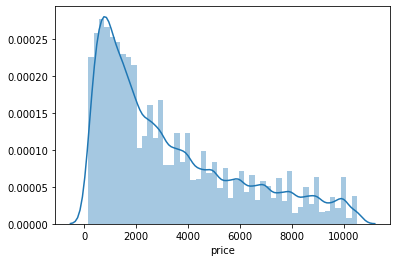

In [225]:
sns.distplot(df[(df['price']>=150) & (df['price']<=10500)]['price'])

In [226]:
df[(df['price']>=150) & (df['price']<=10500)].shape

(299161, 20)